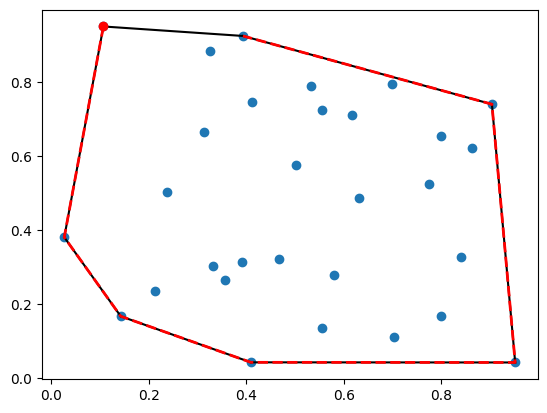

In [1]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

# Generate some random points
points = np.random.rand(30, 2)  # 30 random points in 2-D

# Compute the convex hull
hull = ConvexHull(points)

# Plotting
plt.plot(points[:, 0], points[:, 1], 'o')  # plot the points
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')  # plot the hull

# Optionally, you can also plot the hull vertices
plt.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'r--', lw=2)
plt.plot(points[hull.vertices[0], 0], points[hull.vertices[0], 1], 'ro')  # start point

plt.show()


In [2]:
hull.simplices

array([[18, 28],
       [ 3,  5],
       [ 7,  5],
       [12, 18],
       [12,  3],
       [ 6, 28],
       [ 6,  7]], dtype=int32)

In [7]:
points[hull.simplices[:, 0]]

array([[0.10655163, 0.94993313],
       [0.90379769, 0.73983815],
       [0.40917898, 0.04233768],
       [0.39293372, 0.92433172],
       [0.39293372, 0.92433172],
       [0.14218795, 0.16678307],
       [0.14218795, 0.16678307]])

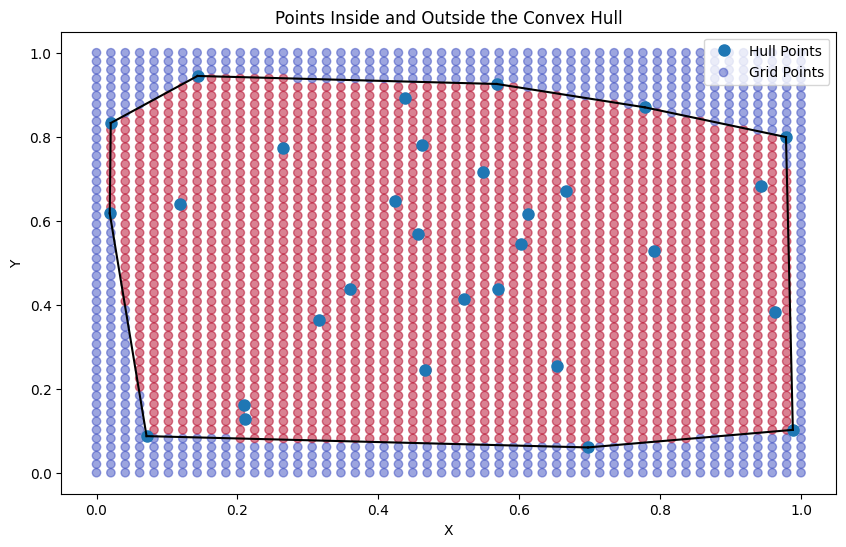

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, Delaunay

# Step 1: Generate a set of points to create a convex hull
np.random.seed(0)  # Seed for reproducibility
points_for_hull = np.random.rand(30, 2)  # 30 random points in 2-D
hull = ConvexHull(points_for_hull)

# Step 2: Generate a uniform grid of points to represent the 2D space
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
xx, yy = np.meshgrid(x, y)
grid_points = np.vstack([xx.ravel(), yy.ravel()]).T

# Step 3: Use Delaunay triangulation for point-in-hull testing
delaunay = Delaunay(points_for_hull[hull.vertices])
is_inside = delaunay.find_simplex(grid_points) >= 0

# Step 4: Visualization
plt.figure(figsize=(10, 6))
# Plot hull points
plt.plot(points_for_hull[:, 0], points_for_hull[:, 1], 'o', markersize=8, label='Hull Points')
# Plot grid points, colored by whether they are inside the convex hull
plt.scatter(grid_points[:, 0], grid_points[:, 1], c=is_inside, cmap='coolwarm', alpha=0.5, label='Grid Points')
# Plot the convex hull boundary
for simplex in hull.simplices:
    plt.plot(points_for_hull[simplex, 0], points_for_hull[simplex, 1], 'k-')

plt.legend()
plt.title('Points Inside and Outside the Convex Hull')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


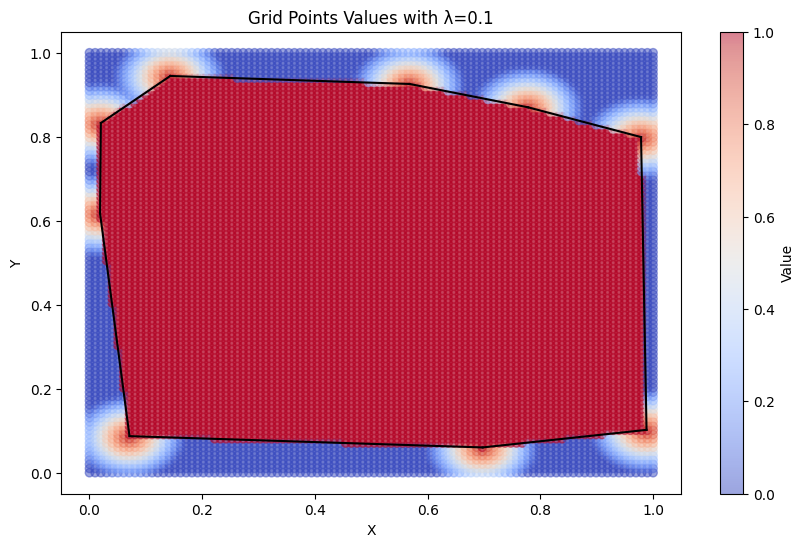

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, Delaunay
from scipy.spatial.distance import cdist

# Parameters
lambda_value = 0.1  # Adjust this parameter to control the distance effect

# Step 1: Generate points for the convex hull
np.random.seed(0)
points_for_hull = np.random.rand(30, 2)
hull = ConvexHull(points_for_hull)

# Step 2: Generate a uniform grid of points
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, y)
grid_points = np.vstack([xx.ravel(), yy.ravel()]).T

# Use Delaunay for inside convex hull check
delaunay = Delaunay(points_for_hull[hull.vertices])
is_inside = delaunay.find_simplex(grid_points) >= 0

# Calculate distance to nearest hull edge for points outside the hull
outside_points = grid_points[~is_inside]
if len(outside_points) > 0:
    hull_points = points_for_hull[hull.vertices]
    distances = np.min(cdist(outside_points, hull_points), axis=1)
    values_outside = np.maximum(1 - distances / lambda_value, 0)
else:
    values_outside = np.array([])

# Assign values
values = np.ones(len(grid_points))
values[~is_inside] = values_outside

# Step 3: Visualization
plt.figure(figsize=(10, 6))
# Plot the convex hull
for simplex in hull.simplices:
    plt.plot(points_for_hull[simplex, 0], points_for_hull[simplex, 1], 'k-')

# Plot grid points colored by their values
plt.scatter(grid_points[:, 0], grid_points[:, 1], c=values, cmap='coolwarm', alpha=0.5)

plt.colorbar(label='Value')
plt.title(f'Grid Points Values with λ={lambda_value}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


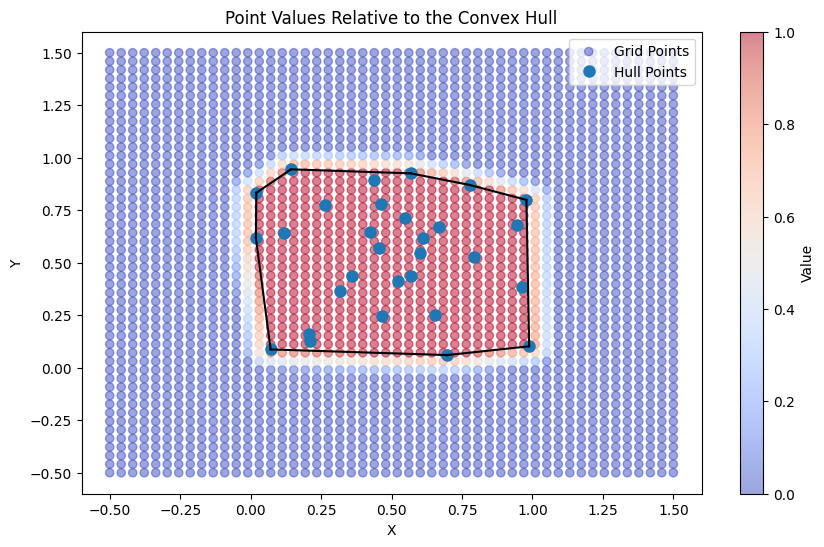

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, Delaunay
from scipy.spatial.distance import cdist

# Function to calculate distance from a point to a line segment
def point_line_distance(point, line_start, line_end):
    """Calculate the distance from a point to a line segment."""
    line_vec = line_end - line_start
    point_vec = point - line_start
    line_len = np.linalg.norm(line_vec)
    line_unitvec = line_vec / line_len
    point_vec_scaled = point_vec / line_len
    t = np.dot(line_unitvec, point_vec_scaled)    
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = line_vec * t
    distance = np.linalg.norm(point_vec - nearest)
    return distance

# Generate a set of points to create a convex hull
np.random.seed(0)
points_for_hull = np.random.rand(30, 2)
hull = ConvexHull(points_for_hull)

# Generate a uniform grid of points to represent the 2D space
x = np.linspace(-0.5, 1.5, 50)
y = np.linspace(-0.5, 1.5, 50)
xx, yy = np.meshgrid(x, y)
grid_points = np.vstack([xx.ravel(), yy.ravel()]).T

# Use Delaunay triangulation for point-in-hull testing
delaunay = Delaunay(points_for_hull[hull.vertices])
is_inside = delaunay.find_simplex(grid_points) >= 0

# Initialize an array to store the value for each grid point
values = np.zeros(grid_points.shape[0])

# Lambda parameter
lambda_param = 0.1

# Compute values for each point
for i, point in enumerate(grid_points):
    if is_inside[i]:
        values[i] = 1
    else:
        # Calculate distances to all hull edges and take the minimum
        distances = [point_line_distance(point, points_for_hull[edge[0]], points_for_hull[edge[1]]) for edge in hull.simplices]
        min_distance = np.min(distances)
        values[i] = max(1 - min_distance / lambda_param, 0)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(grid_points[:, 0], grid_points[:, 1], c=values, cmap='coolwarm', alpha=0.5, label='Grid Points')
plt.colorbar(label='Value')
plt.plot(points_for_hull[:, 0], points_for_hull[:, 1], 'o', markersize=8, label='Hull Points')
for simplex in hull.simplices:
    plt.plot(points_for_hull[simplex, 0], points_for_hull[simplex, 1], 'k-')

plt.legend()
plt.title('Point Values Relative to the Convex Hull')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
